In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def match_images(image1, image2):
    # Initialize SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()

    # Detect keypoints and compute descriptors for both images
    keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(image2, None)


    print('\n\n\n\t\t\t                                                   _________Image_1_Keypoints___________\n\n\n')
    img_1 = cv2.drawKeypoints(image1,keypoints1,image1)
    cv2_imshow(img_1)

    print('\n\n\n\t\t\t                                                   _________Image_2_Keypoints___________\n\n\n')
    img_2 = cv2.drawKeypoints(image2,keypoints2,image2)
    cv2_imshow(img_2)



    #feature matching
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    matches = bf.match(descriptors1,descriptors2)
    matches = sorted(matches, key = lambda x:x.distance)

    print('\n\n\n\t\t\t                                                   _________Keypoints_Matching___________\n\n\n')
    img_3 = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], image2, flags=2)
    plt.imshow(img_3),plt.show()





    # Initialize FLANN matcher
    FLANN_INDEX_KDTREE = 1
    flann_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    matcher = cv2.FlannBasedMatcher(flann_params, {})

    # Find matches between the descriptors of the two images
    matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test to filter out good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.9* n.distance:
            good_matches.append(m)

    # Return judgement based on the number of good matches
    if len(good_matches) >  10:
        return True
    else:
        return False





			                                                   _________Original_Image_1___________





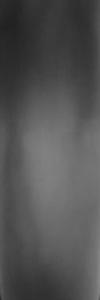




			                                                   _________Original_Image_2___________





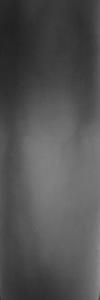




			                                                        _________MASK_1___________





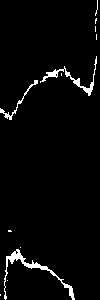




			                                                        _________MASK_2___________





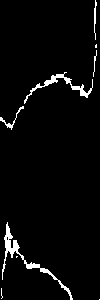




			                                                   _________Image_1_Keypoints___________





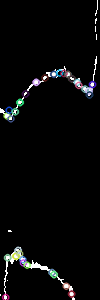




			                                                   _________Image_2_Keypoints___________





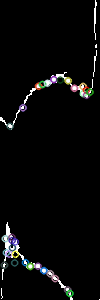




			                                                   _________Keypoints_Matching___________





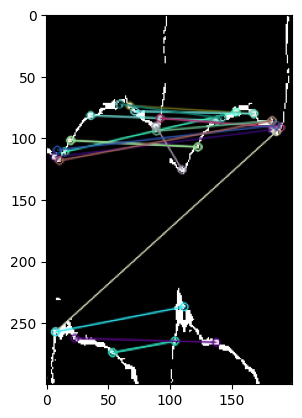

True



			                                                        _________MASK_1___________





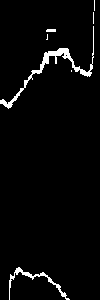




			                                                        _________MASK_2___________





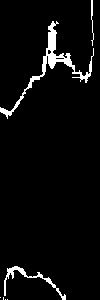




			                                                   _________Image_1_Keypoints___________





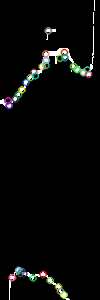




			                                                   _________Image_2_Keypoints___________





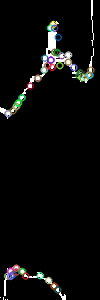




			                                                   _________Keypoints_Matching___________





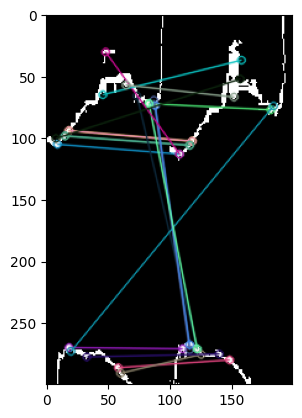

True



			                                                        _________MASK_1___________





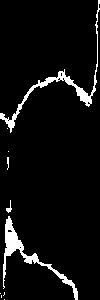




			                                                        _________MASK_2___________





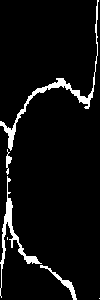




			                                                   _________Image_1_Keypoints___________





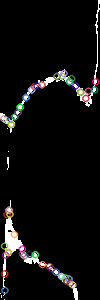




			                                                   _________Image_2_Keypoints___________





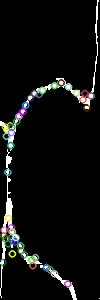




			                                                   _________Keypoints_Matching___________





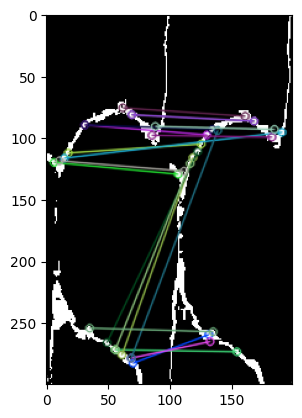

True


In [ ]:
# # Load the input image
img1 = cv2.imread('/content/01.jpg')
img2 = cv2.imread('/content/02.jpg')


# Convert the image to the HSV color space
hsv1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
hsv2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

lower_color = np.array([0, 0, 68])
upper_color = np.array([0, 0, 70])

mask1 = cv2.inRange(hsv1 , lower_color, upper_color)
mask2 = cv2.inRange(hsv2 , lower_color, upper_color)

# Display the input image, mask, and output image
print('\n\n\n\t\t\t                                                   _________Original_Image_1___________\n\n\n')
cv2_imshow( img1)
print('\n\n\n\t\t\t                                                   _________Original_Image_2___________\n\n\n')
cv2_imshow( img2)
print('\n\n\n\t\t\t                                                        _________MASK_1___________\n\n\n')
cv2_imshow( mask1)
print('\n\n\n\t\t\t                                                        _________MASK_2___________\n\n\n')
cv2_imshow( mask2)
print(match_images(mask1,mask2))


lower_color = np.array([0, 0, 60])
upper_color = np.array([0, 0, 62])

mask1 = cv2.inRange(hsv1 , lower_color, upper_color)
mask2 = cv2.inRange(hsv2 , lower_color, upper_color)

# Display the input image, mask, and output image
print('\n\n\n\t\t\t                                                        _________MASK_1___________\n\n\n')
cv2_imshow( mask1)
print('\n\n\n\t\t\t                                                        _________MASK_2___________\n\n\n')
cv2_imshow( mask2)
print(match_images(mask1,mask2))



lower_color = np.array([0, 0, 71])
upper_color = np.array([0, 0, 75])

mask1 = cv2.inRange(hsv1 , lower_color, upper_color)
mask2 = cv2.inRange(hsv2 , lower_color, upper_color)

# Display the input image, mask, and output image
print('\n\n\n\t\t\t                                                        _________MASK_1___________\n\n\n')
cv2_imshow( mask1)
print('\n\n\n\t\t\t                                                        _________MASK_2___________\n\n\n')
cv2_imshow( mask2)
print(match_images(mask1,mask2))